## Notebook to visualise the four group datasets 

In [ ]:
using CairoMakie
using RData 
using DataFrames

In [2]:
# load in the data
file_path = "C:/Users/20192809/OneDrive - TU Eindhoven/TUe/Thesis/Synthetic data tests/Robustness sets/four_group_data_noise_0.2.Rdata"

data = load(file_path)["data"];


┌ Warning: Found `resolution` in the theme when creating a `Scene`. The `resolution` keyword for `Scene`s and `Figure`s has been deprecated. Use `Figure(; size = ...` or `Scene(; size = ...)` instead, which better reflects that this is a unitless size and not a pixel resolution. The key could also come from `set_theme!` calls or related theming functions.
└ @ Makie C:\Users\20192809\.julia\packages\Makie\VRavR\src\scenes.jl:220


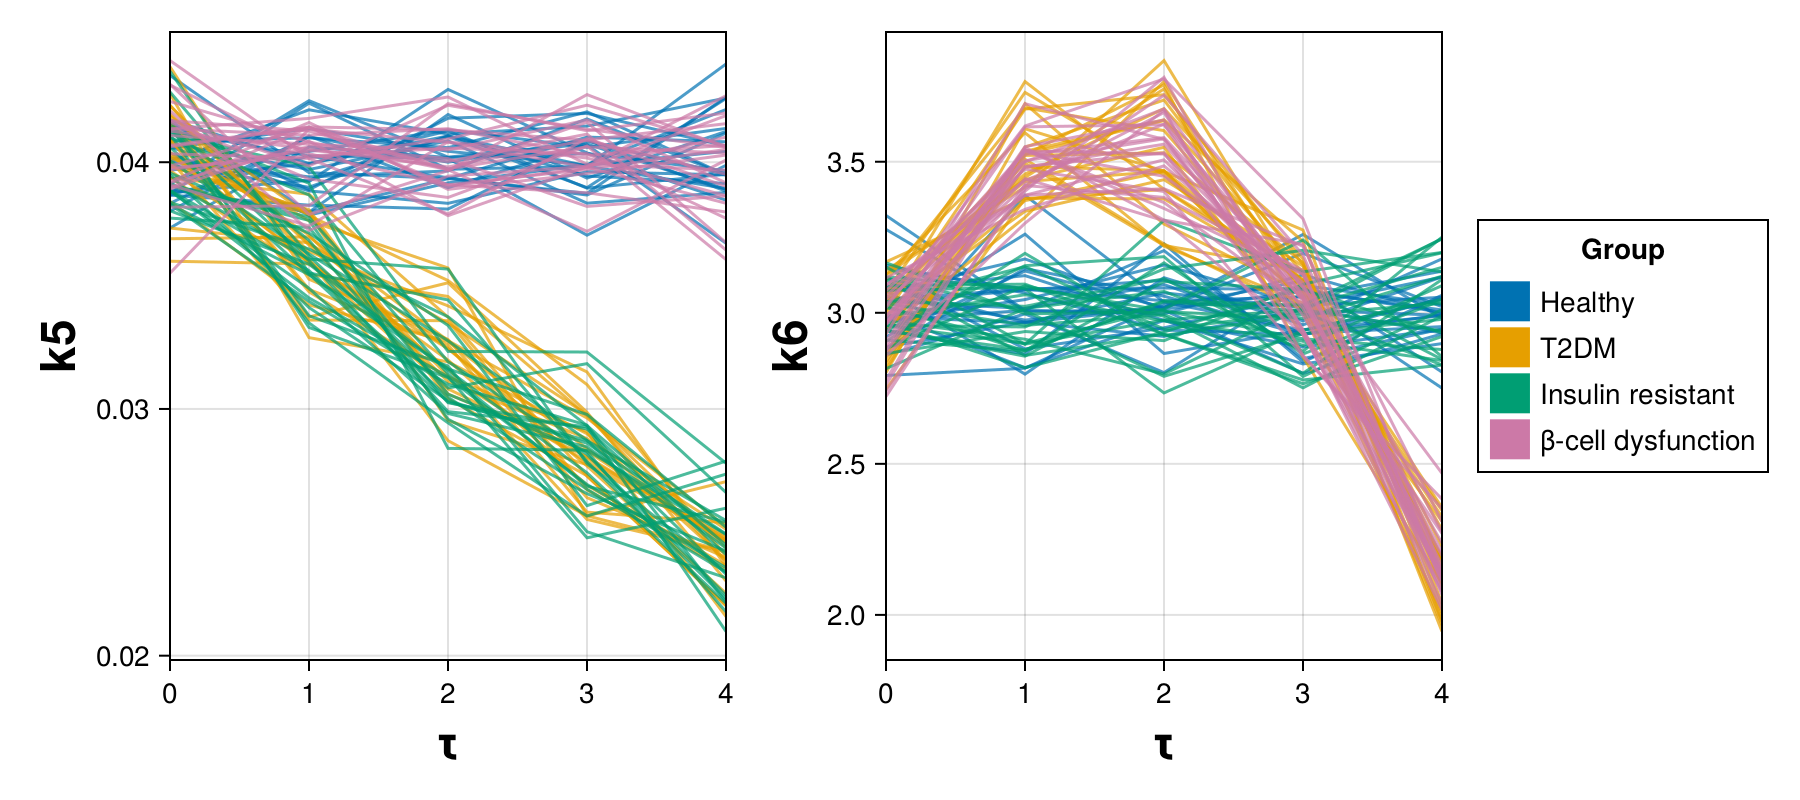

In [4]:
# Define group mappings
group_names = Dict("1" => "Healthy", "2" => "T2DM", "3" => "Insulin resistant", "4" => "β-cell dysfunction")
group_labels = unique(data[:, end])  # Extract unique group labels (as strings)

# Define colours for each group
colormap = Makie.wong_colors()[1:length(group_labels)]
group_colors = Dict(group_labels .=> colormap)

# Create figure with two subplots and a shared x-axis
fig = Figure(resolution = (900, 400))
ax1 = Axis(fig[1, 1], xlabel="τ", ylabel="k5", 
           xlabelsize=24, ylabelsize=24, 
           xticklabelsize=14, yticklabelsize=14, 
           xlabelfont=:bold, ylabelfont=:bold)

ax2 = Axis(fig[1, 2], xlabel="τ", ylabel="k6", 
           xlabelsize=24, ylabelsize=24, 
           xticklabelsize=14, yticklabelsize=14, 
           xlabelfont=:bold, ylabelfont=:bold)


# Ensure x-axis spans the same range for both plots
τ_min, τ_max = extrema(data[:, :time])
xlims!(ax1, τ_min, τ_max)
xlims!(ax2, τ_min, τ_max)

# Plot lines for each group
for group in group_labels
    group_data = data[data[:, end] .== group, :]
    for id in unique(group_data[:, :ID])  # Iterate over individuals
        person_data = group_data[group_data[:, :ID] .== id, :]
        lines!(ax1, person_data[:, :time], person_data[:, :k5], color=group_colors[group], alpha =0.7)
        lines!(ax2, person_data[:, :time], person_data[:, :k6], color=group_colors[group], alpha =0.7)
    end
end

# Add legend to position [1,3]
Legend(fig[1, 3], [PolyElement(color=group_colors[g]) for g in group_labels], 
       [group_names[g] for g in group_labels], "Group")

# Display figure
fig

# save figure 
# save("./parameter_trajectories_robustness_set_std=0.2.png", fig)

In [3]:
using CairoMakie

# Define group mappings
group_names = Dict("1" => "Healthy", "2" => "T2DM", "3" => "Insulin resistant", "4" => "β-cell dysfunction")
group_labels = ["1", "3", "4", "2"]  # Reorder so T2DM is last

# Define colours for each group
colormap = Makie.wong_colors()[1:length(group_labels)]
group_colors = Dict(group_labels .=> colormap)

# Calculate global min and max for k5 and k6
k5_min, k5_max = extrema(data[:, :k5])
k6_min, k6_max = extrema(data[:, :k6])

# Create figure with a (4, 2) grid of subplots
fig = Figure(resolution = (1200, 1400))  # Adjust resolution for clarity

# Iterate over each group and create subplots
for (i, group) in enumerate(group_labels)
    # Create subplots for k5 and k6 in the current row
    ax1 = Axis(fig[i, 1], xlabel="τ", ylabel="k5", 
               xlabelsize=24, ylabelsize=20, 
               xticklabelsize=12, yticklabelsize=12, 
               xlabelfont=:bold, ylabelfont=:bold,
               )

    ax2 = Axis(fig[i, 2], xlabel="τ", ylabel="k6", 
               xlabelsize=24, ylabelsize=20, 
               xticklabelsize=12, yticklabelsize=12, 
               xlabelfont=:bold, ylabelfont=:bold,
               )

    # Ensure x-axis spans the same range for both subplots
    τ_min, τ_max = extrema(data[:, :time])
    xlims!(ax1, τ_min, τ_max)
    xlims!(ax2, τ_min, τ_max)

    # Set consistent y-axis limits for k5 and k6
    ylims!(ax1, k5_min - 0.1*k5_min, k5_max + 0.1*k5_max)
    ylims!(ax2, k6_min - 0.1*k6_min, k6_max + 0.1*k6_max)

    # Plot lines for the current group
    group_data = data[data[:, end] .== group, :]
    for id in unique(group_data[:, :ID])  # Iterate over individuals
        person_data = group_data[group_data[:, :ID] .== id, :]
        lines!(ax1, person_data[:, :time], person_data[:, :k5], color=group_colors[group], alpha=0.7)
        lines!(ax2, person_data[:, :time], person_data[:, :k6], color=group_colors[group], alpha=0.7)
    end
end

# Add a single legend for all groups at the bottom
Legend(fig[end+1, :], 
       [PolyElement(color=group_colors[g]) for g in group_labels], 
       [group_names[g] for g in group_labels], 
       "Group", orientation=:horizontal, titlesize=20, labelsize=20,
       tellwidth=false,  halign=:center, labelfont = :bold)  # Align legend to the right

# Adjust layout spacing
colgap!(fig.layout, 5)
rowgap!(fig.layout, 10)

# Display figure
fig

# Save figure
save("./fig42_parameter_trajectories_robustness_set_std=0.2.png", fig)

┌ Warning: Found `resolution` in the theme when creating a `Scene`. The `resolution` keyword for `Scene`s and `Figure`s has been deprecated. Use `Figure(; size = ...` or `Scene(; size = ...)` instead, which better reflects that this is a unitless size and not a pixel resolution. The key could also come from `set_theme!` calls or related theming functions.
└ @ Makie C:\Users\20192809\.julia\packages\Makie\VRavR\src\scenes.jl:220


CairoMakie.Screen{IMAGE}
